Nice plots of elliptical mass cut

In [1]:
import os
import uproot
import matplotlib.pyplot as plt
import matplotlib
from matplotlib.patches import Ellipse
import mplhep as hep
plt.style.use(hep.style.CMS)

## Non-resonant 

In [2]:
ellipses = {
    "ZZ" : dict(x=100, y=81, w=126, h=142),
    "ZbbHtt" : dict(x=129, y=80, w=113, h=93),
    "ZttHbb" : dict(x=91, y=102, w=83, h=143)
}
lumi = {"2018" : 59741, "2017":41529, "2016":16800, "2016_HIPM":19500}

In [11]:
def plot(h, ellipse, analysis:str, signal:bool, output:str|None, year="2018"):
    plt.figure()
    cbar = hep.hist2dplot(h, flow=False, rasterized=True).cbar
    ellipse = Ellipse(xy=(ellipse["x"], ellipse["y"]), width=ellipse["w"]*2, height=ellipse["h"]*2, fill=False, ec="tab:green", lw=3, hatch="/")
    plt.gca().add_patch(ellipse)
    if analysis == "ZZ":
        an_text = r"$ZZ \to bb\tau\tau$"
    elif analysis == "ZbbHtt":
        an_text = r"$Z_{bb}H_{\tau\tau}$"
    elif analysis == "ZttHbb":
        an_text = r"$Z_{\tau\tau}H_{bb}$"
    if signal:
        text_top_right = an_text + " signal"
    else:
        text_top_right = an_text + " backgrounds"
    plt.text(0.97, 0.97, text_top_right, ha="right", va="top", transform=plt.gca().transAxes, color="white")
    cbar.set_label("Events")
    hep.cms.text("Simulation Preliminary", fontsize=23)

    hep.cms.lumitext(f"{year}, 13 TeV (${lumi[year]/ 1000:.1f}\/""fb^{-1}$)", fontsize=18)
    plt.xlabel(r"$m_{\tau\tau}^{SVfit}$ [GeV]")
    plt.ylabel(r"$m_{bb}$ [GeV]")
    plt.ylim(top=300)
    if output:
        out_folder = f"/grid_mnt/data__data.polcms/cms/{os.environ['USER']}/cmt/NicePlots/ellipses/{output}/"
        os.makedirs(out_folder, exist_ok=True)
        # bbox : [[xmin, ymin], [xmax, ymax]]
        plt.savefig(out_folder + ("signal" if signal else "background") + ".pdf", bbox_inches=matplotlib.transforms.Bbox(((0, 0), (11.3, 9.6))))

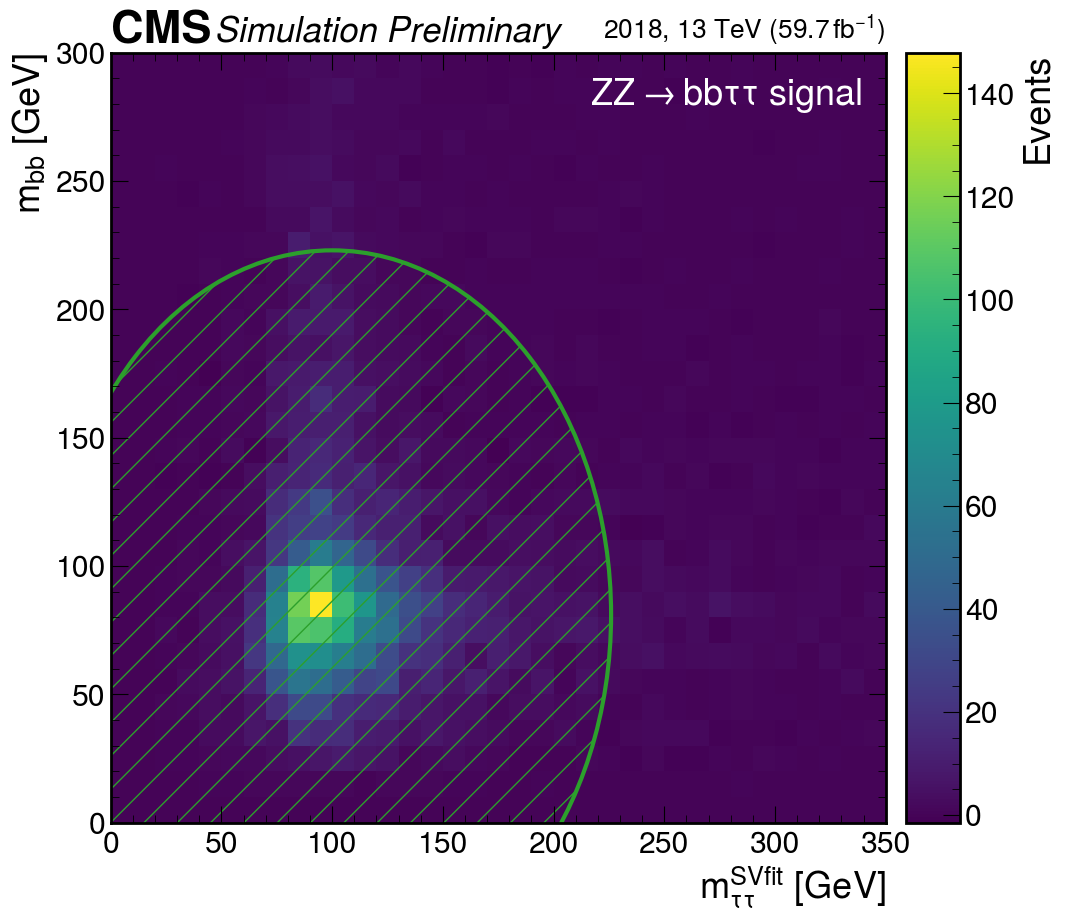

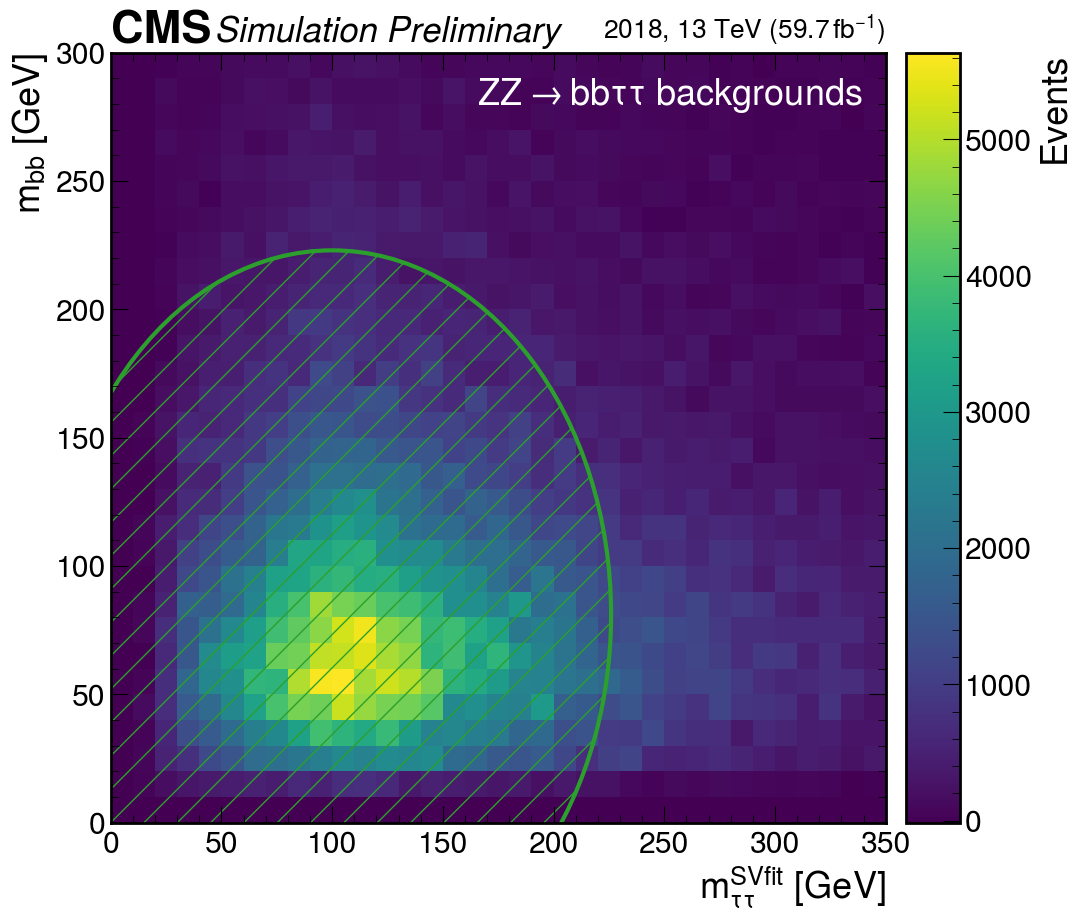

In [21]:
file = uproot.open("/grid_mnt/data__data.polcms/cms/vernazza/cmt/FeaturePlot2D/ul_2018_ZZ_v10/cat_base/prod_240208/root/Ztt_svfit_mass_ellipse_Zbb_mass_ellipse__pg_zz_sig_vs_bkg__nodata.root:histograms")
plot(file["zz_sl_signal"], dict(x=100, y=81, w=126, h=142), analysis="ZZ", signal=True, output="ul_2018_ZZ_v12")
plot(file["background"], dict(x=100, y=81, w=126, h=142), analysis="ZZ", signal=False, output="ul_2018_ZZ_v12")

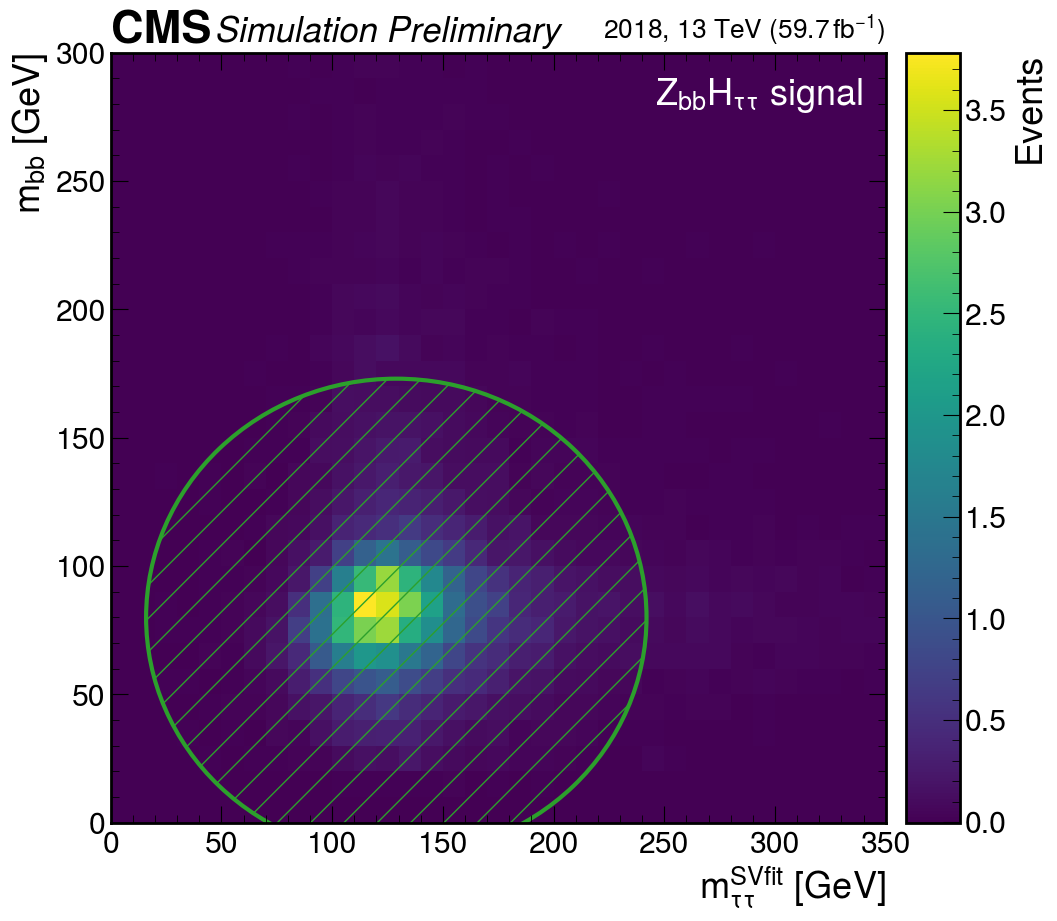

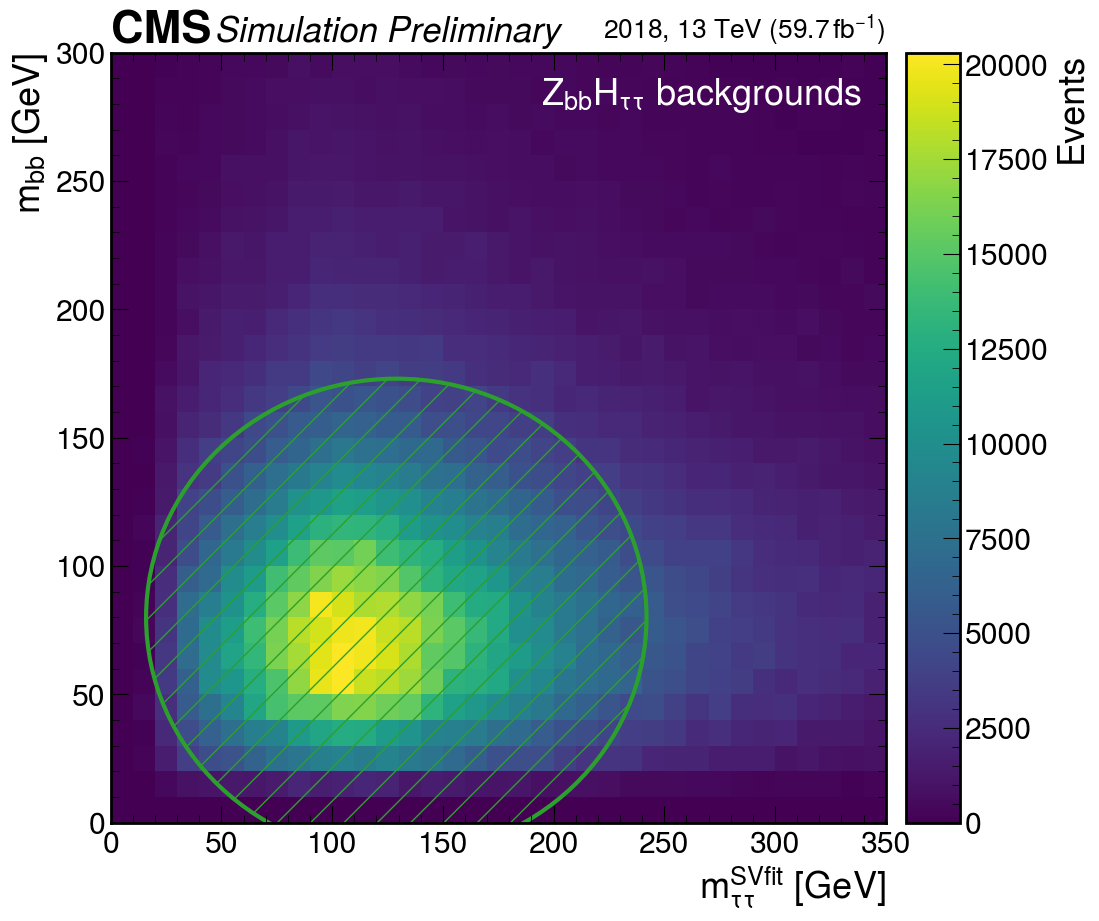

In [18]:
file = uproot.open("/grid_mnt/data__data.polcms/cms/cuisset/cmt/FeaturePlot2D/ul_2018_ZbbHtt_v12/cat_base/prod_240318/root/Htt_svfit_mass_ellipse_Zbb_mass_ellipse__pg_zh_sig_vs_bkg__nodata.root:histograms")
plot(file["zh_zbb_htt_signal"], dict(x=129, y=80, w=113, h=93), analysis="ZbbHtt", signal=True, output="ul_2018_ZbbHtt_v12")
plot(file["background"], dict(x=129, y=80, w=113, h=93), analysis="ZbbHtt", signal=False, output="ul_2018_ZbbHtt_v12")

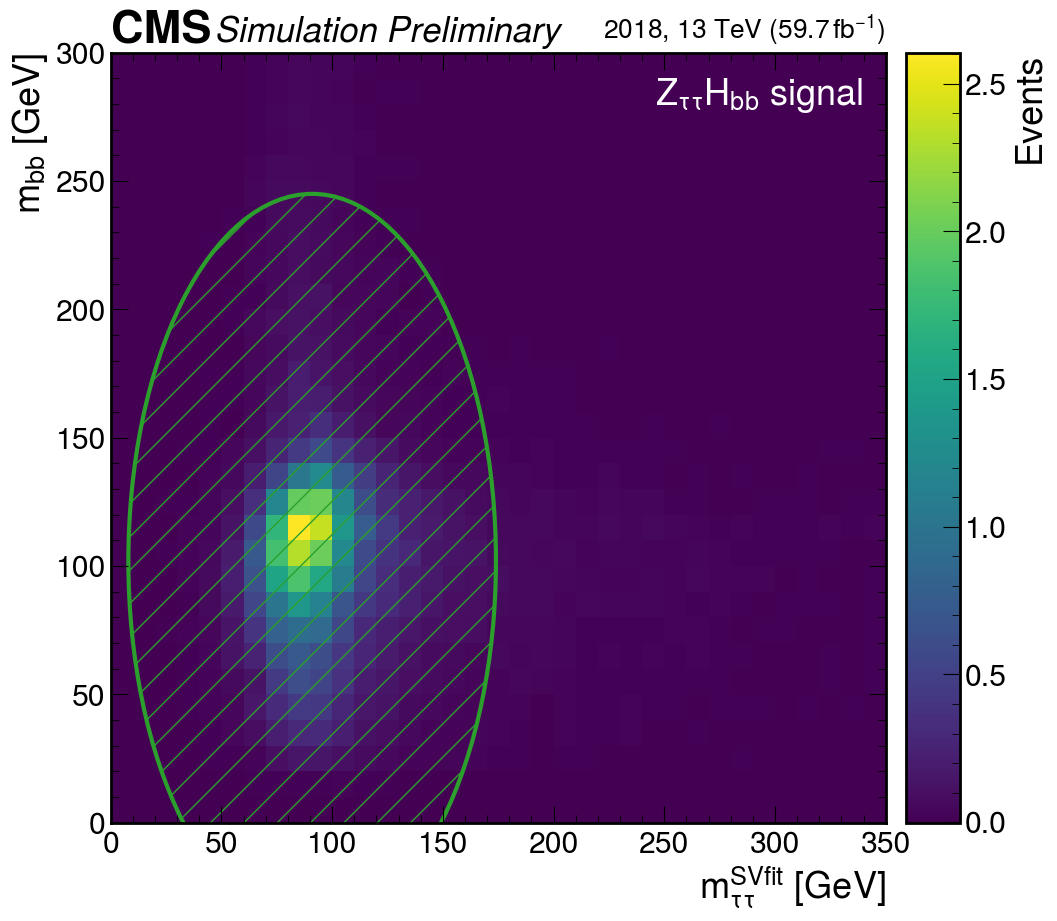

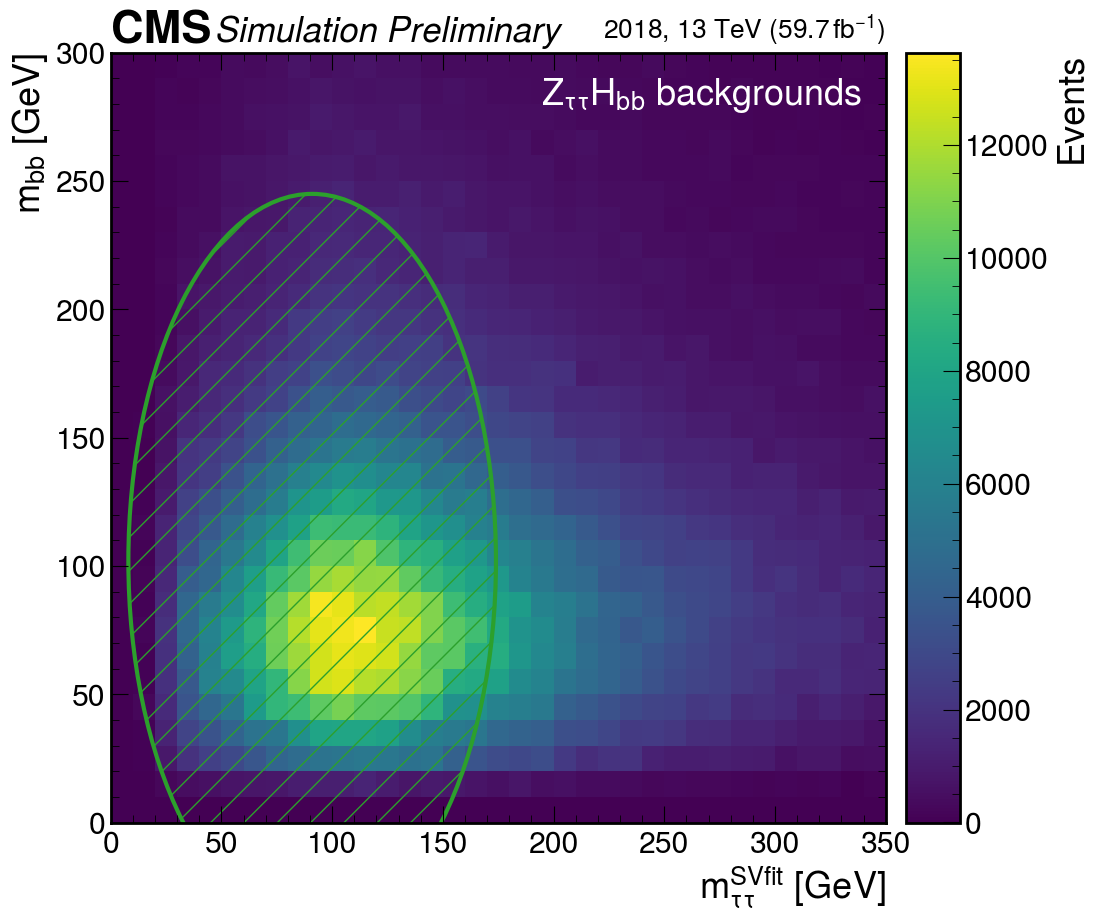

In [33]:
file = uproot.open("/grid_mnt/data__data.polcms/cms/cuisset/cmt/FeaturePlot2D/ul_2018_ZH_v10/cat_base/prod_231222/root/Ztt_svfit_mass_ellipse_Zbb_mass_ellipse__pg_zh_sig_vs_bkg__nodata.root:histograms")
plot(file["zh_ztt_hbb_sl_signal"], dict(x=91, y=102, w=83, h=143), analysis="ZttHbb", signal=True, output="ul_2018_ZttHbb_v12")
plot(file["background"], dict(x=91, y=102, w=83, h=143), analysis="ZttHbb", signal=False, output="ul_2018_ZttHbb_v12")

In [43]:
for year in ["2016", "2016_HIPM", "2017", "2018"]:
    for analysis in ["ZZ", "ZttHbb", "ZbbHtt"]:
        try:
            file = uproot.open(f"/grid_mnt/data__data.polcms/cms/{'vernazza' if analysis == 'ZZ' else 'cuisset'}/cmt/FeaturePlot2D/ul_{year}_{analysis}_v12/cat_base/prod_240318/root/{'H' if analysis == 'ZbbHtt' else 'Z'}tt_svfit_mass_ellipse_{'H' if analysis == 'ZttHbb' else 'Z'}bb_mass_ellipse__pg_{'zz_res_sig_vs_bkg' if analysis == 'ZZ' else 'zh_sig_vs_bkg'}__nodata.root:histograms")
            if analysis == "ZZ":
                signal = "zz_sl_signal"
            elif analysis == "ZbbHtt":
                signal = "zh_zbb_htt_signal"
            elif analysis == "ZttHbb":
                signal = "zh_ztt_hbb_signal"
            plot(file[signal], ellipses[analysis], analysis=analysis, signal=True, output=f"ul_{year}_{analysis}_v12", year=year)
            plt.close()
            plot(file["background"], ellipses[analysis], analysis=analysis, signal=False, output=f"ul_{year}_{analysis}_v12", year=year)
            plt.close()
        except FileNotFoundError as e:
            print(e)
        

## Resonant

In [5]:
def plot_res(file, ellipse, analysis:str, prefix="Zprime_Zh_Zbbhtautau_", masses:list=[500, 1000, 2000, 3000], output:str|None=None, year="2018"):
    plt.figure()
    h_names = [prefix + "M" + str(mass) for mass in masses]
    h = sum([file[h_name].to_hist() for h_name in h_names])
    pcolormesh, cbar, text = hep.hist2dplot(h, flow=False, linewidth=0, rasterized=True)
    pcolormesh.set_edgecolor('face')
    ellipse = Ellipse(xy=(ellipse["x"], ellipse["y"]), width=ellipse["w"]*2, height=ellipse["h"]*2, fill=False, ec="tab:green", lw=3, hatch="/")
    plt.gca().add_patch(ellipse)
    if analysis == "ZZ":
        an_text = r"$ZZ \to bb\tau\tau$"
    elif analysis == "ZbbHtt":
        an_text = r"$Z' \to Z_{bb}H_{\tau\tau}$"
    elif analysis == "ZttHbb":
        an_text = r"$Z' \to Z_{\tau\tau}H_{bb}$"
    text_top_right = an_text + " resonant signal\n" + ", ".join(map(str, masses)) + " GeV"
    plt.text(0.97, 0.97, text_top_right, ha="right", va="top", transform=plt.gca().transAxes, color="white")
    cbar.set_label("Events")
    hep.cms.text("Simulation Preliminary", fontsize=23)

    hep.cms.lumitext(f"{year}, 13 TeV (${lumi[year]/ 1000:.1f}\/""fb^{-1}$)", fontsize=18)
    plt.xlabel(r"$m_{\tau\tau}^{SVfit}$ [GeV]")
    plt.ylabel(r"$m_{bb}$ [GeV]")
    plt.ylim(top=300)
    if output:
        out_folder = f"/grid_mnt/data__data.polcms/cms/{os.environ['USER']}/cmt/NicePlots/ellipses/{output}/"
        os.makedirs(out_folder, exist_ok=True)
        # bbox : [[xmin, ymin], [xmax, ymax]]
        plt.savefig(out_folder + "signal" + ".pdf", bbox_inches=matplotlib.transforms.Bbox(((0, 0), (11.3, 9.6))))

In [9]:
for year in ["2018"]:#["2016", "2016_HIPM", "2017", "2018"]:
    for analysis in ["ZbbHtt", "ZttHbb"]:#["ZZ", "ZttHbb", "ZbbHtt"]:
        try:
            if analysis == 'ZZ':
                process_group_name = ''
                prefix=""
            elif analysis == "ZbbHtt":
                process_group_name = "Zprime_Zh_Zbbhtt"
                prefix="Zprime_Zh_Zbbhtautau_"
            elif analysis == "ZttHbb":
                process_group_name = "Zprime_Zh_Ztautauhbb"
                prefix="Zprime_Zh_Ztautauhbb_"
            
            file = uproot.open(f"/grid_mnt/data__data.polcms/cms/{'vernazza' if analysis == 'ZZ' else 'cuisset'}/cmt/FeaturePlot2D/ul_{year}_{analysis}_v12/cat_base/prod_240318/root/{'H' if analysis == 'ZbbHtt' else 'Z'}tt_svfit_mass_ellipse_{'H' if analysis == 'ZttHbb' else 'Z'}bb_mass_ellipse__pg_{process_group_name}__nodata.root:histograms")
            plot_res(file, ellipses[analysis], analysis=analysis, output=f"ul_{year}_{analysis}_v12_resonant", year=year, prefix=prefix)
            plt.close()
        except FileNotFoundError as e:
            print(e)
        

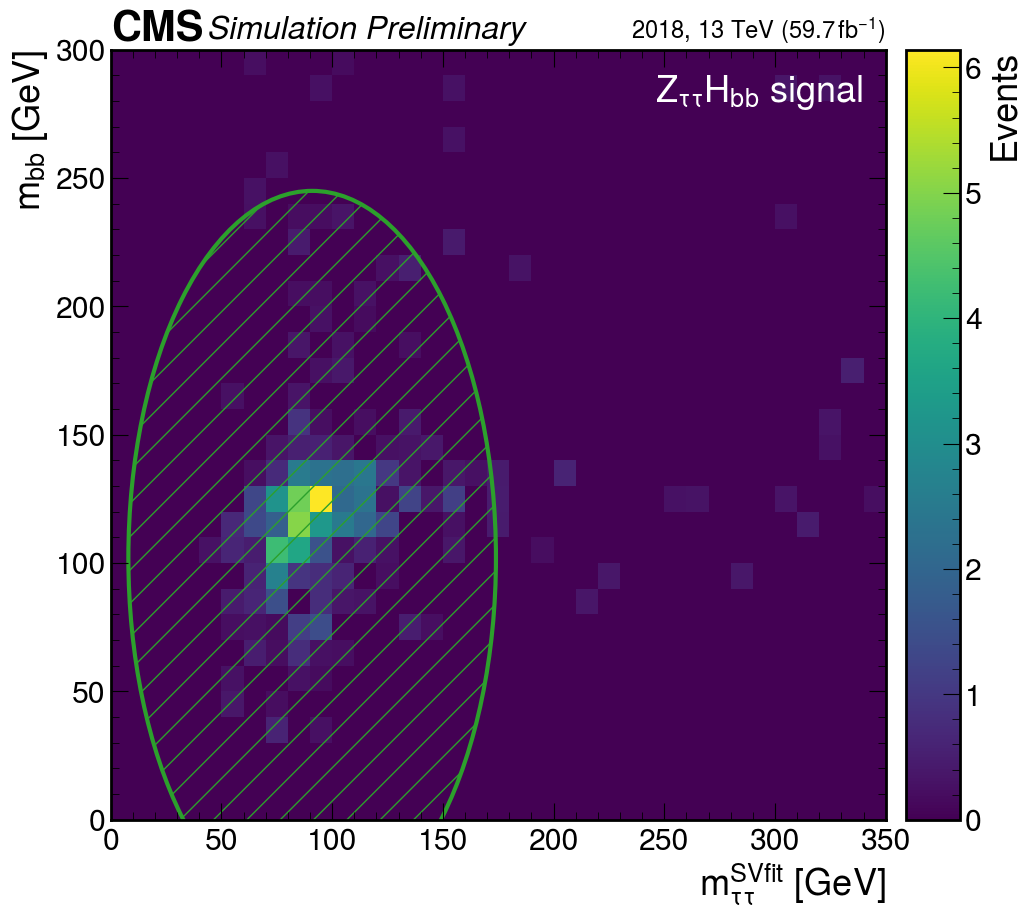

In [12]:
plot(file["Zprime_Zh_Ztautauhbb_M2000"], ellipses["ZttHbb"], analysis="ZttHbb", signal=True, output=None)